<a href="https://colab.research.google.com/github/Devphadatare/Prodigy-Infotech/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

#1: Import Necessary Libraries

In [21]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#2: Load and Explore the Dataset

In [22]:
# Step 2: Load the datasets
data_full = pd.read_csv('bank-full.csv', delimiter=';')
data_sample = pd.read_csv('bank.csv', delimiter=';')

# Combine the datasets
data = pd.concat([data_full, data_sample])

# Explore the dataset
print(data.head())
print(data.info())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Col

#3: Preprocess the Data

In [23]:
# Step 3: Preprocess the data
# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features (X) and target variable (y)
X = data.drop('y', axis=1)  # Features
y = data['y']               # Target variable (purchase or not)


#4: Train the Decision Tree Classifier and Evaluate the Model

In [24]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Build and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_split=50)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 89.02%
Confusion Matrix:
 [[12901   308]
 [ 1330   381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     13209
           1       0.55      0.22      0.32      1711

    accuracy                           0.89     14920
   macro avg       0.73      0.60      0.63     14920
weighted avg       0.87      0.89      0.87     14920



#5: Visualize the Results

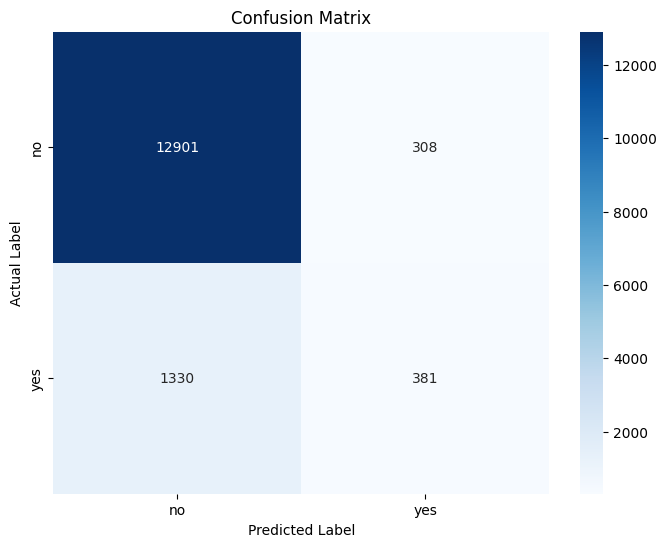

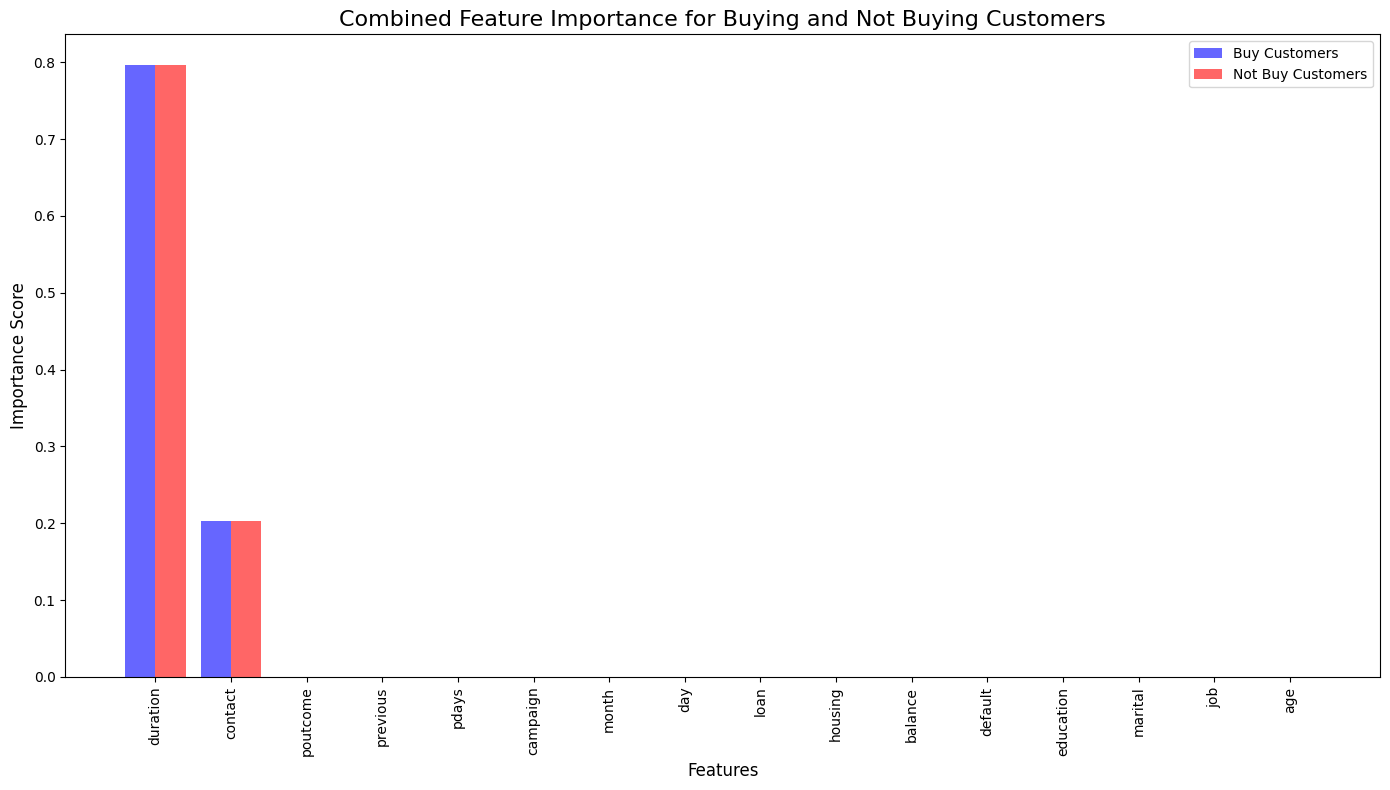

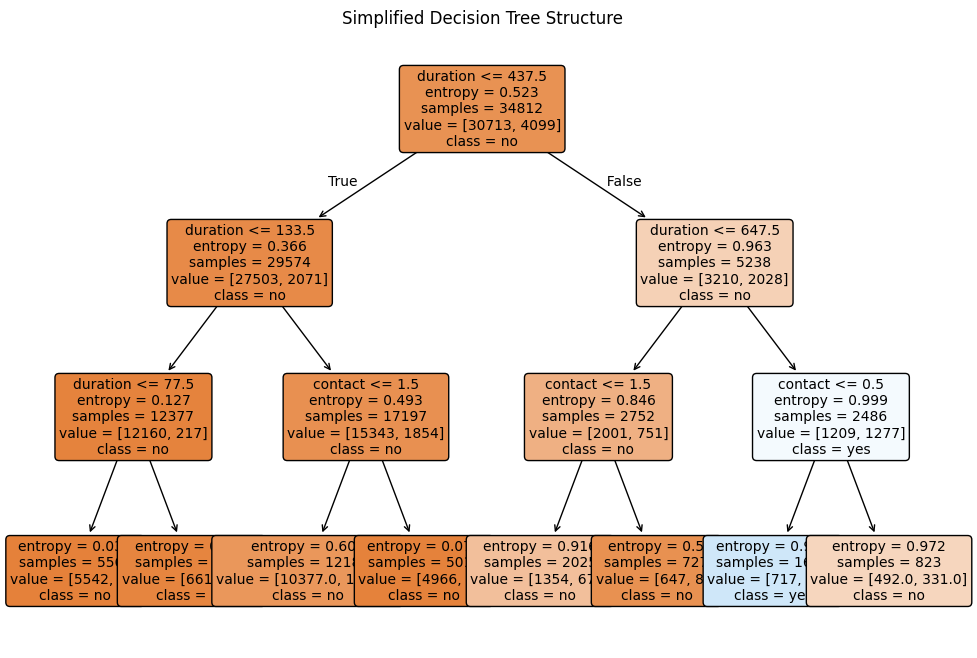

In [25]:
# Step 7: Visualize the results
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['y'].classes_, yticklabels=label_encoders['y'].classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Combined feature importance plot for buying and not buying
importances = clf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(indices))

plt.bar(index, importances[indices], bar_width, color='blue', label='Buy Customers', alpha=0.6)
plt.bar([i + bar_width for i in index], importances[indices], bar_width, color='red', label='Not Buy Customers', alpha=0.6)

plt.xticks([i + bar_width/2 for i in index], X.columns[indices], rotation=90)
plt.title('Combined Feature Importance for Buying and Not Buying Customers', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the simplified decision tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['y'].classes_, rounded=True, fontsize=10)
plt.title('Simplified Decision Tree Structure')
plt.show()
